# Análise de dados - Estatística básica
A estatistica pode responder diversas perguntas como:

    - Qual a probabilida?
    - Se algo mudar mihas vendas podem aumentar?
    - Quantas pessoas estarão dispostas a pagar?
    - Como melhorar as vendas?
    - Quanto eu devo fabricar para vender ao máximo de pessoas?
    - Se aumentar o preço quantas pessoas estão dispostas a pagar?
    - Qual melhor meio de marketing mais eficaz?
    
Estatística não pode responder:

    - Porque o cliente gosta desse produto?
           * resp: por que é vermleho
           * Mas o preto vende mais!
         

# Pergunta para depois:
Por que outliers influenciam na média mas não na mediana?

# Bibliotecas

In [5]:
import numpy as np
import pandas as pd

# Aquisição de dados

In [6]:
# Vamos usar o dataframe titanic apenas para exemplificar o estudo
df = pd.read_csv("train.csv")
df = df.drop(df[['Cabin']], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
# se tiver missing values impossivel calcular a média e mediana, vamos elminar?
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
# eliminando missing values (só teste, por GOD não façam isso)
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
df.shape

(712, 11)

# Média

In [10]:
# exemplo média de uma coluna com numpy:
media_age = np.mean(df.Age)
print(f'Média de idade no Titanic: {int(media_age)} anos')

# ou pandas:

media_age_pd = df.Age.mean()
print(f'Média de idade no Titanic: {int(media_age_pd)} anos')

Média de idade no Titanic: 29 anos
Média de idade no Titanic: 29 anos


# Média ponderada
Na média ponderada cada valor é multiplicado por um peso, e sua divisão se da pela soma desses pesos.<br>
Supomos notas de avaliacão, 3 notas valendo 10, primeira avaliação tem peso 2, segunda peso 3 e terceira peso 5,
vamos calcular a média ponderada:

In [11]:
notas = [7, 9, 8]
pesos = [2, 3, 5]
# Soma de cada nota multiplicado pelo seu peso
nota = (notas[0]*pesos[0]) + (notas[1]*pesos[1]) + (notas[2]*pesos[2])
# divide esse resultado pela soma de seus pesos
media_ponderada = nota/sum(pesos)

print(f'A media ponderada é {media_ponderada}')

A media ponderada é 8.1


# Mediana

Organiza os dados em ordem crescente e 50% dos nossos dados estão abaixo 
e 50% estão acima da mediana, isso para valores impares, para pares não existe
um valor central, então para isso fazemos a média dos 2 valores centrais para achar a mediana. Exemplo de cálculo da mediana:

In [12]:
# exemplo mediana de uma coluna com numpy:
mediana_age = np.median(df.Age)
print(f'Mediana de idade no Titanic: {mediana_age} anos')

# ou pandas:

mediana_age_pd = df.Age.median()
print(f'Médiana de idade no Titanic: {mediana_age_pd} anos')

Mediana de idade no Titanic: 28.0 anos
Médiana de idade no Titanic: 28.0 anos


# Moda

Moda é o número que aparece mais vezes em um conjunto. Se somente um numero aparece mais vezes então dizemos que e um conjunto unimodal.

Existe outro numero que aparece mesma quantidade de vezes? se sim então é um conjunto bimodal

Nenhum numero aparece mais que os outros então é um conjunto sem moda.

In [13]:
# value_ counts mostra quantas vezes cada valor se repete
# note que temos 11 pessoas com 36 anos, essa será a moda.
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [14]:
# calculando a moda com biblioteca statistics
import statistics
moda = statistics.mode(df.Age)
print(f'No titanic, a maioria das pessoas tem {moda} anos')

No titanic, a maioria das pessoas tem 24.0 anos


In [15]:
# moda tbm pode ser calculada pra variáveis categoricas, por exemplo:
# Existem mais homens ou mulheres no titanic?
sexo = statistics.mode(df.Sex)

# Trocando male por masculino e female por feminino
if sexo =='male':
    sexo = "masculino"
else:
    sexo = "feminino"
    
print(f'No titanic, a maioria das pessoas são do sexo {sexo}')

No titanic, a maioria das pessoas são do sexo masculino


# Função Limites (Quartis)
Medidas separatrizes

In [16]:
''' Função para detectar outliers usando as regras do quartis
    Consiste dividir nossos dados em quantis 25% e 75% (Q1 e Q3)
    a amplitude ou variação interquartil (IQR)é a diferença entre Q3 e Q1
    assim definimos os limites inferior = Q1 - 1,5 * IQR
    e os limites superiores que são     = Q3 + 1.5 * IQR
    Tudo que está abaixo ou acima dos limites são considerados outliers
'''
def limites(coluna):
    q1 = coluna.quantile(0.25) #pega primeiro quartil em 25%
    q3 = coluna.quantile(0.75) #pega terveiro quartil em 75%
    amplitude = q3 - q1
    lim_inferior = q1 - 1.5 * amplitude
    lim_superior = q3 + 1.5 * amplitude
    return lim_inferior, lim_superior

# Função de remoção de outliers

In [17]:
# Função que irá remover os limites superior e inferior:
def excluir_outliers(df, nome_coluna):
    # pega as qnt de linhas do df (0 = linhas e 1 = colunas)
    qnt_linhas = df.shape[0] 
    
    # pega os limites
    lim_inf, lim_sup = limites(df[nome_coluna])
    
    # filtra no df somente valores (lim inf <= DF <= lim sup)
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup) , :]
    
    # pega qnt de linhas removidas
    linhas_removidas = qnt_linhas - df.shape[0]
    
    # retorna DF filtrado e nº de linhas removidas
    return df, linhas_removidas

# Funções Gráficas

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def diagrama_caixa(coluna):
    # define um grafico do lado do outro 1 linha 2 colunas(plt do matplotlib)
    # ax1 = eixo do 1º grafico e ax2 do segundo.
    fig, (ax1, ax2) = plt.subplots(1, 2) 
    
    # seta tamanho do grafico
    fig.set_size_inches(15,5) 
    
    # cria grafico automático com os valores da coluna recebida
    sns.boxplot(x=coluna, ax = ax1)
    
    # cria grafico automático com os valores da coluna recebida
    # com a diferença que ax2 vai ficar entre os limites inferior e superior
    # então chamamos a função "limites"
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax = ax2)

In [19]:
def histograma(coluna):
    plt.figure(figsize=(15,5))
    #sns.distplot(coluna, hist=True)
    sns.histplot(coluna, kde=True)

# Detectando outliers com a média

In [40]:
# Simulando erro de digitação, acrescentando uma pessoa com 80 mil anos

df1 = df.copy()
df1.loc[1, "Age"] = 80000
df1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,80000.0,1,0,PC 17599,71.2833,C


In [49]:
# Note que a média de idade subiu para 141 anos (outlier)

mediana = df1.Age.median()

print(f'A maioria das pessoas tem {df1.Age.median()} anos')
print(f'A média de idade é de {df1.Age.mean():.0f} anos')

A maioria das pessoas tem 28.0 anos
A média de idade é de 142 anos


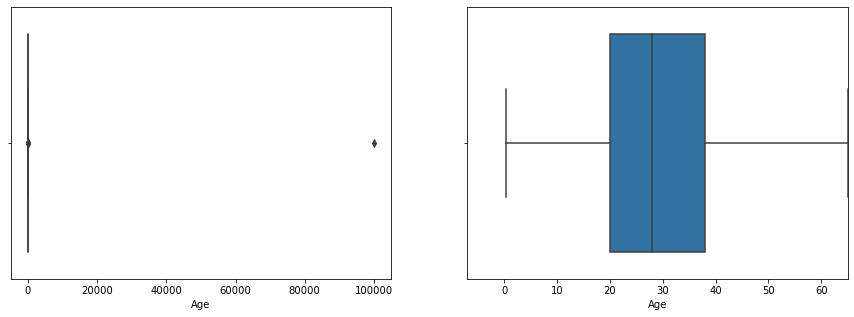

In [22]:
diagrama_caixa(df1.Age)

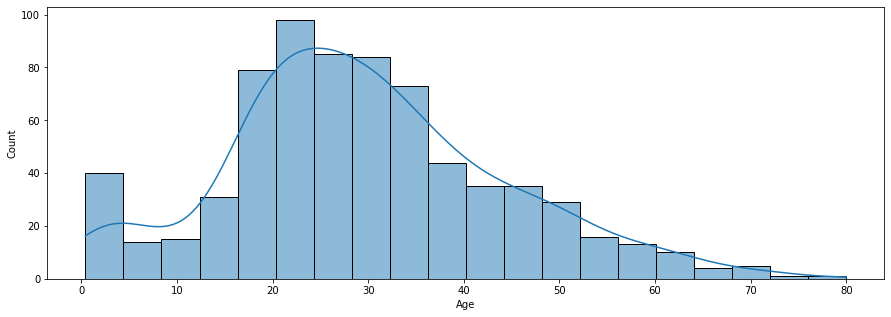

In [23]:
# histograma abaixo esta simetrico pois não há outliers
histograma(df.Age)

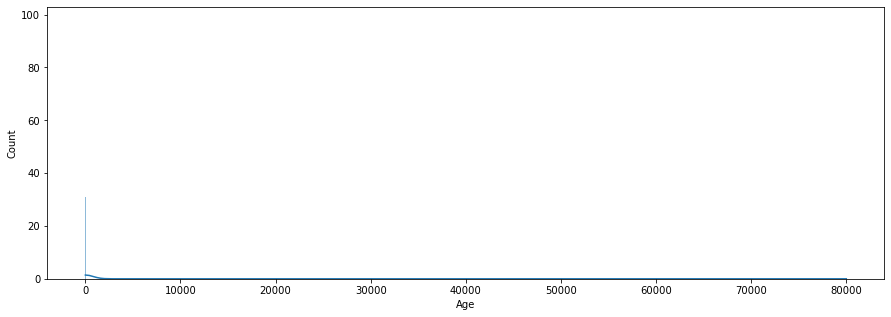

In [42]:
#histograma assimetrico deslocado a esquerda pois há outliers
histograma(df1.Age)

# Quantil
Quantil ou percentis, é a função que divide os dados em partes, um quantil 0.5 divide os dados em 50% abaixo e 50% acima, e um quantil 0.5 é justamente a mediana. Função numpy é NP.QUNATIL().

O quartil é um dos quantil mais usado na estatística (entre outros) e podemos usar a regra dos quartis para detectar outliers em conjunto de dados. Em suma, a regra dos quartis divide nosso conjunto de dados em 4 partes sendo elas Q1 = 25%, Q2 = 50% e Q3 = 75%

In [25]:
# Calculando quantil 0.5
np.quantile(df.Age, 0.5)

28.0

In [26]:
# pegando conjunto de quantis
np.quantile(df.Age, [0, 0.25, 0.50, 0.75, 1])

array([ 0.42, 20.  , 28.  , 38.  , 80.  ])

In [27]:
# podemos usar tbm np.linspace (inicio, fim, qnt de quantis)
np.quantile(df.Age, np.linspace(0, 1 , 5))

array([ 0.42, 20.  , 28.  , 38.  , 80.  ])

Com base nos quantis, podemos afirmar que:

    - 25% estão abaixo de 20 anos
    - 50% abaixo de 28 anos
    - 75% abaixo de 38 ou 25% acima de 38 anos
    - 100% das pessoas tem de 80 anos abaixo.

In [28]:
# para confirmar veremos as idades máxima e minima da tabela.
df.Age.min(), df.Age.max()

(0.42, 80.0)

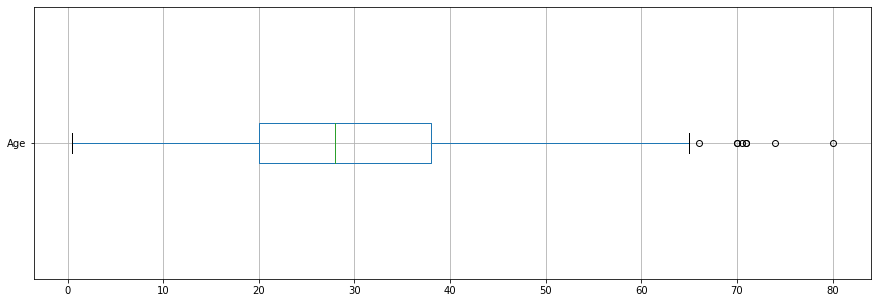

In [29]:
# boxplot
df.boxplot(['Age'], vert=False, figsize=(15, 5))
plt.show()

# Medidas de dispersão
São medidas de espalhamento dos dados, ou seja, o quanto os dados estão espalhados em relação a média. A medida de dispersão pode ser calculada usando alguns métodos:

- Variância amostral: quando se calcula apenas uma amostra da população, nesse caso a divisão é feita por (n - 1) onde n é o numero de amostras.
- Variância populacional quando se calcula o todo da população a ser medida.
- Desvio Médio: É a raiz da variância, que nos dá um valor de ajuste de +- a variância.
- Desvio médio absoluto: 

In [30]:
# Tenho uma tabela de produção de funcionários ao longo de 5 dias
df_prod = pd.read_csv('producao.csv', sep=';')
df_prod

,Func A,Func B,Func C,Func D,Func E
0,7,6,17,12,7
1,4,14,3,11,5
2,9,17,8,9,14
3,11,16,6,10,18
4,5,15,14,12,19


#### Calculando na unha (sem auxilio do np)

In [31]:
#OBS abs() = módulo do valor

desvio = abs((7-7.2)+(4-7.2)+(9-7.2)+ (11-7.2)+ (5-7.2))
variancia = abs((7-7.2)**2 +(4-7.2)**2 +(9-7.2)**2 + (11-7.2)**2 + (5-7.2)**2)/5
desvio_padrão = np.sqrt(variancia) #raiz da variancia
desvio_padrão_medio = desvio/5

print(f"Desvio = {desvio}")
print(f"Variância = {variancia}")
print(f"Desvio padrão = {desvio_padrão}")
print(f"Desvio padrão médio = {desvio_padrão_medio}")

Desvio = 8.881784197001252e-16
Variância = 6.5600000000000005
Desvio padrão = 2.5612496949731396
Desvio padrão médio = 1.7763568394002506e-16


### Média 

In [32]:
# calculando a média para cada funcionário e colocando numa lista:
lista_media = []

for func in df_prod.columns:
    media = df_prod[func].mean()
    lista_media.append(media) 
print(lista_media)

[7.2, 13.6, 9.6, 10.8, 12.6]


#### Com base na tabela vamos calcular as variâncias para responder:
Qual funcionário mantém o padrão de produtividade?<br>
Qual funcionário produz de forma desigual?

## Variância populacional
Variância é quão os dados estão distantes da média (módulo - valores positivos). por exemplo, numa fábrica, a variancia mede a taxa de variação da produção de cada funcionário em relação a si mesmo, pois nem todos produzem a mesma quantidade todos os dias. Quanto menor a variância mais próximo da média esse funcionário produz.

- Para cálculo da variância usamos np.var()
- Onde o parâmetro ddof:
    - Zero (0) para variancia populacional
    - Um (1) para variância amostral

Então quando fazemos o cálculo da variância amostral, devemos definir ddof=1.

In [33]:
# calculando a variância para cada funcionário e colocando numa lista:
lista_variancia = []

for func in df_prod.columns:
    var = np.var(df_prod[func], ddof=0)
    lista_variancia.append(var)

display(lista_variancia)

[6.5600000000000005, 15.440000000000003, 26.639999999999997, 1.36, 32.24]

Sabendo-se que, quanto maior for a variância, mais dispersos estão em relação a média, e quanto menor for a variância, mais homogênios estarão em relação a média.

Então podemos responder que o FUNCIONÁRIO D mantém o padrão de produtividade, e o FUNCIONÁRIO C produz de forma desigual.

# Desvio padrão
Os dados de variância são muito sensíveis a outliers (valores fora do padrão), e além de serem elevados ao quadrado podem camuflar sua interpretação, uma alternativa para isso é usar outra medida de dispersão, o desvio padrão.

Desvio padrão nada mais é do que um ajuste de mais ou menos a raiz quadrada da variância.

In [34]:
lista_DP = []

for valor in lista_variancia:
    DP = np.sqrt(valor)
    lista_DP.append(DP)

display(lista_DP)

[2.5612496949731396,
 3.9293765408777004,
 5.161395160225576,
 1.1661903789690602,
 5.678027826631356]

#### Com base no desvio padrão podemos responder:
    - Qual a produtividade diária do funcionário A?

In [35]:
print(f'O funcionário A produz {lista_media[0]} +- {lista_DP[0]} por dia!')
print(f'Em torno de {(lista_media[0] - lista_DP[0]):,.1f} a {lista_media[0] + lista_DP[0]} peças por dia!')


O funcionário A produz 7.2 +- 2.5612496949731396 por dia!
Em torno de 4.6 a 9.76124969497314 peças por dia!


# Desvio médio absoluto
Desvio médio absoluto é a média dos desvios, e se aproxima muito do desvio padrão, porém por não ser elevado ao quadrado como desvio padrão ele está menos propenso a sofrer com outliers.

In [36]:
desvios = df_prod['Func A'] - np.mean(df_prod['Func A'])
DMA = np.mean(desvios)
print(abs(DMA))

1.7763568394002506e-16


# Resposta da pergunta para depois!

In [37]:
#df1 tem um outlier na idade de 100.000 anosw
df.Age.mean(), df.Age.median(), df1.Age.mean(), df1.Age.median()

(29.64209269662921, 28.0, 170.03816011235955, 28.0)